In [ ]:
using JSON3
using Plots
using JLD2

Load the folds for the two classes

In [ ]:
c4_folds_f = jldopen("../kepler_c4_folds.jld2", "r")
c4_folds = read(c4_folds_f, "folds");
c6_folds_f = jldopen("../kepler_c6_folds.jld2", "r")
c6_folds = read(c6_folds_f, "folds");

In [ ]:
c4_dict = Dict{Int, Dict{Int, Dict{String, Vector{Vector{Float64}}}}}()
for fold in 1:30
    instance_dict = Dict{Int, Dict{String, Vector{Vector{Float64}}}}()
    for instance in 1:25
        train = c4_folds[fold][1][instance]
        test = c4_folds[fold][2][instance]
        instance_dict[instance] = Dict("train" => train, "test" => test)
    end
    c4_dict[fold] = instance_dict
end

Save as JSON to open in python

In [ ]:
c4_folds[1][1][1]

41-element Vector{Vector{Float64}}:
 [2.99002455339537e-6, 8.60607329732366e-5, -3.9232012912338e-5, 2.49058493896337e-5, -2.609441388568e-5, -4.1794484101354e-5, -3.97546104655699e-5, -1.59880659875711e-5, 2.14272710441499e-5, 1.85769517427881e-5  …  4.32359916091585e-7, 1.0163793177087e-6, -1.80348851708256e-5, 5.72123581416006e-5, -5.36165440689906e-6, -3.04350460682556e-5, 2.96132209103295e-5, 1.47295964225691e-5, -1.94887499349594e-5, -1.85129663039518e-5]
 [-1.81322881454005e-5, -2.16414987321834e-5, -2.16414987321834e-5, -2.51507093189662e-5, 3.89872036562489e-5, 7.51885131822227e-7, 1.49639586971562e-5, -2.26000745140453e-5, -1.55403368773399e-5, 1.99288611917314e-5  …  5.05706643283421e-6, 8.65258650861733e-6, -7.92658708492766e-6, 9.63941701870308e-6, 2.92080380799309e-5, -2.07702957710776e-5, -4.78711435867307e-5, 3.72417312055617e-6, -3.90373906777874e-5, -3.96271935294568e-5]
 [-2.69369169589861e-5, -1.34431385563349e-5, -1.34431385563349e-5, 5.06398463162583e-8, 2.0097556

In [ ]:
open("c4_folds_python.json", "w") do f 
    JSON3.write(f, c4_folds)
end

65818411

In [ ]:
open("c6_folds_python.json", "w") do f 
    JSON3.write(f, c6_folds)
end

63352831

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [6]:
with open("Python/c4_folds_python.json") as f:
    d = json.load(f)

In [8]:
len(d[0][0])

2

In [66]:
train = np.array(d[0][0][1]).reshape(-1, 100, 1)
test = np.array(d[0][1][1]).reshape(-1, 100, 1)

In [67]:
merged = np.vstack([train, test])

In [71]:
np.max(np.max(merged))

3.58326083891303e-05

In [70]:
np.max(np.max(merged, axis=1))

3.58326083891303e-05

In [36]:
np.array(d[0][1][1]).reshape(-1, 100, 1)

array([[[-8.56018136e-06],
        [-3.17600238e-06],
        [-2.04644975e-05],
        [-2.60903909e-06],
        [-3.01829173e-05],
        [-7.23169125e-06],
        [ 1.57195348e-05],
        [-9.00132686e-06],
        [-9.49297074e-06],
        [ 1.58175559e-06],
        [-9.05566865e-06],
        [-1.18963413e-05],
        [-5.60110263e-06],
        [-5.38875963e-06],
        [ 6.76379994e-06],
        [-1.35016439e-05],
        [-6.69693495e-07],
        [-7.61165069e-06],
        [ 3.08813863e-06],
        [ 2.44246410e-06],
        [-5.39665867e-07],
        [ 6.59686599e-06],
        [-1.09929279e-05],
        [ 1.08913287e-05],
        [ 6.78604038e-06],
        [-2.72785061e-06],
        [ 6.38339401e-06],
        [-3.25187447e-06],
        [-3.92583045e-06],
        [ 1.07118152e-05],
        [-4.57427254e-07],
        [-2.28670586e-06],
        [ 6.56097251e-06],
        [ 7.83869401e-07],
        [-1.53030275e-05],
        [ 4.91946393e-06],
        [ 1.18767530e-05],
 

In [33]:
X_test_original = np.array(d[0][1][1])

In [34]:
len(X_test_original[0])

100

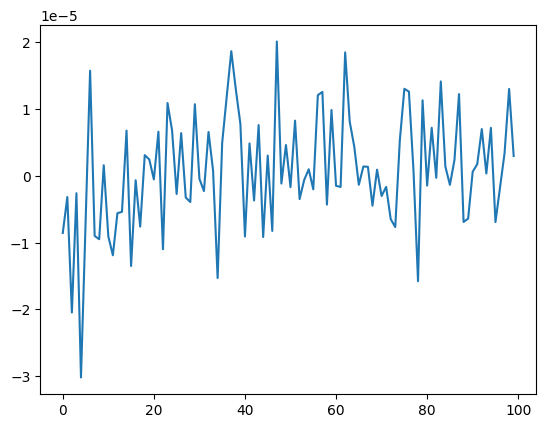

In [26]:
plt.plot(d[0][1][1][0])

Windows

In [ ]:
window_idxs_f = jldopen("/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/FinalBenchmarks/NASA_KeplerV2/kepler_windows_julia_idx.jld2", "r");
window_idxs = read(window_idxs_f, "windows_per_percentage")
close(window_idxs_f)
window_idxs_new = deepcopy(window_idxs)

Dict{Any, Any} with 10 entries:
  0.05 => [[39, 40, 41, 42, 43], [8, 9, 10, 11, 12], [83, 84, 85, 86, 87], [11,…
  0.95 => [[2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  87, 88, 89, 90, 91, 92, 93, 94, …
  0.85 => [[2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  77, 78, 79, 80, 81, 82, 83, 84, …
  0.15 => [[77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91], [64, 6…
  0.55 => [[13, 14, 15, 16, 17, 18, 19, 20, 21, 22  …  58, 59, 60, 61, 62, 63, …
  0.45 => [[7, 8, 9, 10, 11, 12, 13, 14, 15, 16  …  42, 43, 44, 45, 46, 47, 48,…
  0.65 => [[2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  57, 58, 59, 60, 61, 62, 63, 64, …
  0.75 => [[21, 22, 23, 24, 25, 26, 27, 28, 29, 30  …  86, 87, 88, 89, 90, 91, …
  0.25 => [[58, 59, 60, 61, 62, 63, 64, 65, 66, 67  …  73, 74, 75, 76, 77, 78, …
  0.35 => [[42, 43, 44, 45, 46, 47, 48, 49, 50, 51  …  67, 68, 69, 70, 71, 72, …

Adjust for python indexing

In [ ]:
pms = 0.05:0.10:0.95
for pm in pms
    for win in window_idxs_new[pm]
        win .-= 1
    end
end

In [ ]:
window_idxs_new[0.75]

15-element Vector{Vector{Int64}}:
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29  …  85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20  …  76, 77, 78, 79, 80, 81, 82, 83, 84, 85]
 [16, 17, 18, 19, 20, 21, 22, 23, 24, 25  …  81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
 [4, 5, 6, 7, 8, 9, 10, 11, 12, 13  …  69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
 [8, 9, 10, 11, 12, 13, 14, 15, 16, 17  …  73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15  …  71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
 [9, 10, 11, 12, 13, 14, 15, 16, 17, 18  …  74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21  …  77, 78, 79, 80, 81, 82, 83, 84, 85, 86]
 [13, 14, 15, 16, 17, 18, 19, 20, 21, 22  …  78, 79, 80, 81, 82, 83, 84, 85, 86, 87]
 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12  …  68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  65, 66, 67, 68, 69, 70, 71, 72, 73, 74]
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  66, 67, 68, 69, 70, 71, 7

In [ ]:
window_idxs[0.75]

15-element Vector{Vector{Int64}}:
 [21, 22, 23, 24, 25, 26, 27, 28, 29, 30  …  86, 87, 88, 89, 90, 91, 92, 93, 94, 95]
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21  …  77, 78, 79, 80, 81, 82, 83, 84, 85, 86]
 [17, 18, 19, 20, 21, 22, 23, 24, 25, 26  …  82, 83, 84, 85, 86, 87, 88, 89, 90, 91]
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14  …  70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
 [9, 10, 11, 12, 13, 14, 15, 16, 17, 18  …  74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
 [7, 8, 9, 10, 11, 12, 13, 14, 15, 16  …  72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19  …  75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
 [13, 14, 15, 16, 17, 18, 19, 20, 21, 22  …  78, 79, 80, 81, 82, 83, 84, 85, 86, 87]
 [14, 15, 16, 17, 18, 19, 20, 21, 22, 23  …  79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
 [4, 5, 6, 7, 8, 9, 10, 11, 12, 13  …  69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  67, 68, 69, 70, 71

In [ ]:
window_idxs_orig

In [ ]:
open("kepler_windows_python_idx.json", "w") do f 
    JSON3.write(f, window_idxs_new)
end

19804